# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize': [12, 8]}, font_scale=1.2)

# Load Data

In [2]:
df = pd.read_csv("50_Startups.csv") 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Descriptive analysis

In [5]:
df["R&D Spend"].mean()

73721.61559999999

In [6]:
df["Administration"].mean()

121344.63959999995

In [7]:
df["Marketing Spend"].mean()

211025.09780000005

In [8]:
df["Profit"].mean()

112012.63920000002

In [9]:
df["R&D Spend"].mode()[0]

0.0

In [10]:
df["Administration"].mode()[0]

51283.14

In [11]:
df["Marketing Spend"].mode()[0]

0.0

In [12]:
df["Profit"].mode()[0]

14681.4

In [13]:
df["R&D Spend"].std()

45902.25648230753

In [14]:
df["Administration"].std()

28017.802755488683

In [15]:
df["Marketing Spend"].std()

122290.31072584528

In [16]:
df["Profit"].std()

40306.18033765055

In [17]:
df["R&D Spend"].median()

73051.08

In [18]:
df["Administration"].median()

122699.795

In [19]:
df["Marketing Spend"].median()

212716.24

In [20]:
df["Profit"].median()

107978.19

# Data Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

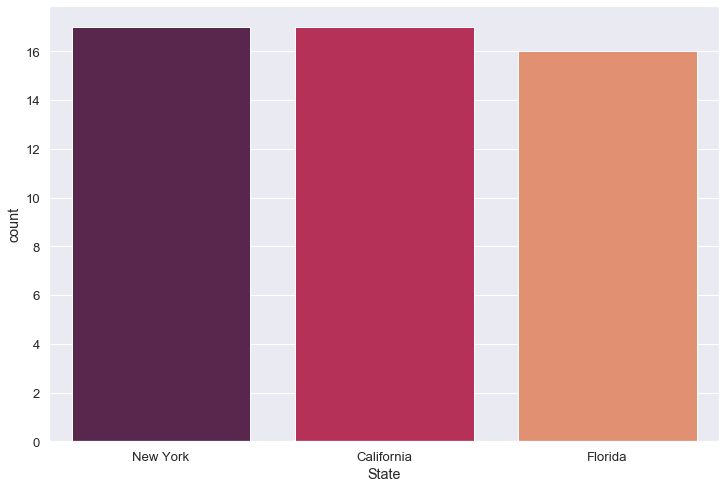

In [22]:
sns.countplot(df['State'],palette="rocket");

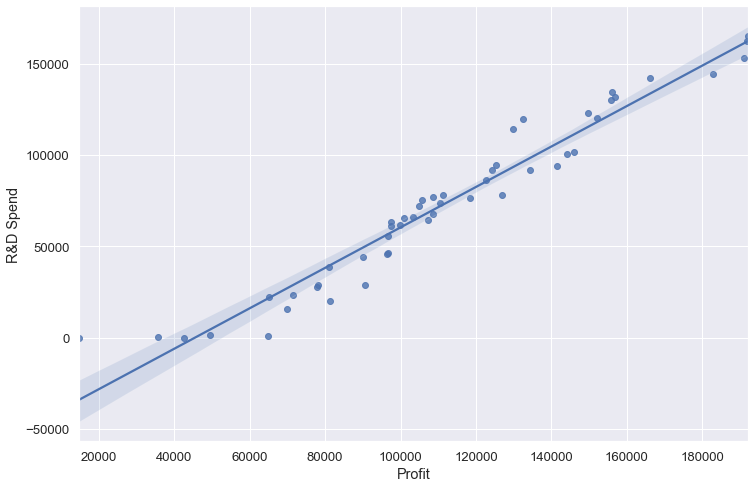

In [23]:
sns.regplot(df['Profit'],df['R&D Spend'])

we have strong postive correlation between Research and Development spend and Profit

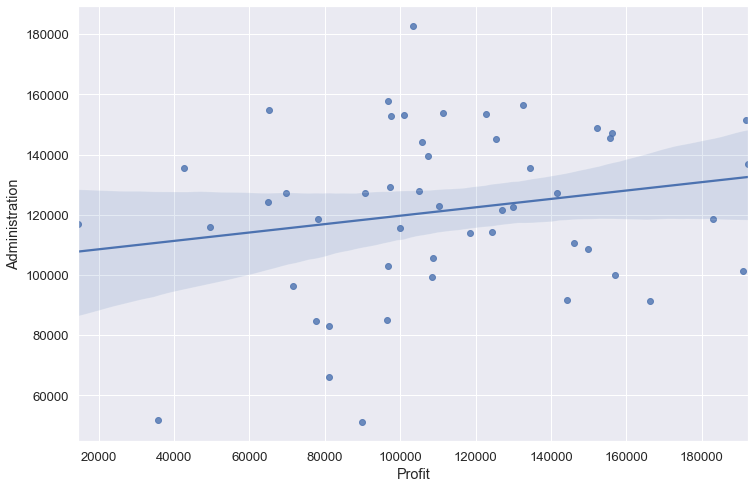

In [24]:
sns.regplot(df['Profit'],df['Administration'])

we don't have correlation between Administration and Profit

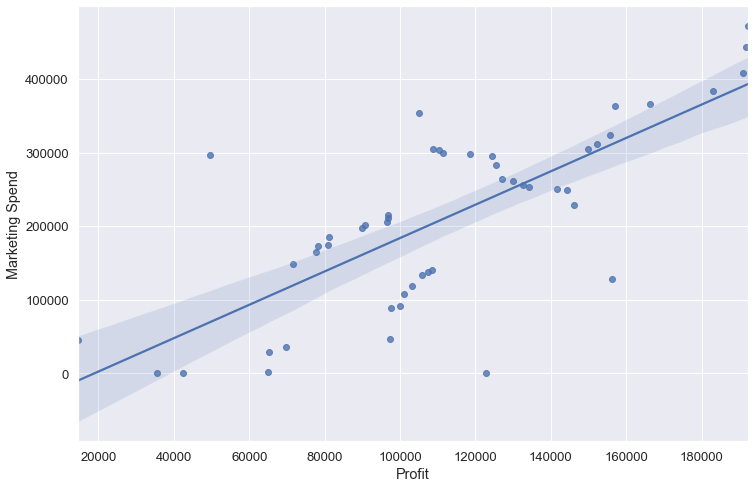

In [25]:
sns.regplot(df['Profit'],df['Marketing Spend'])

we have weak postive correlation between Marketing spend and Profit

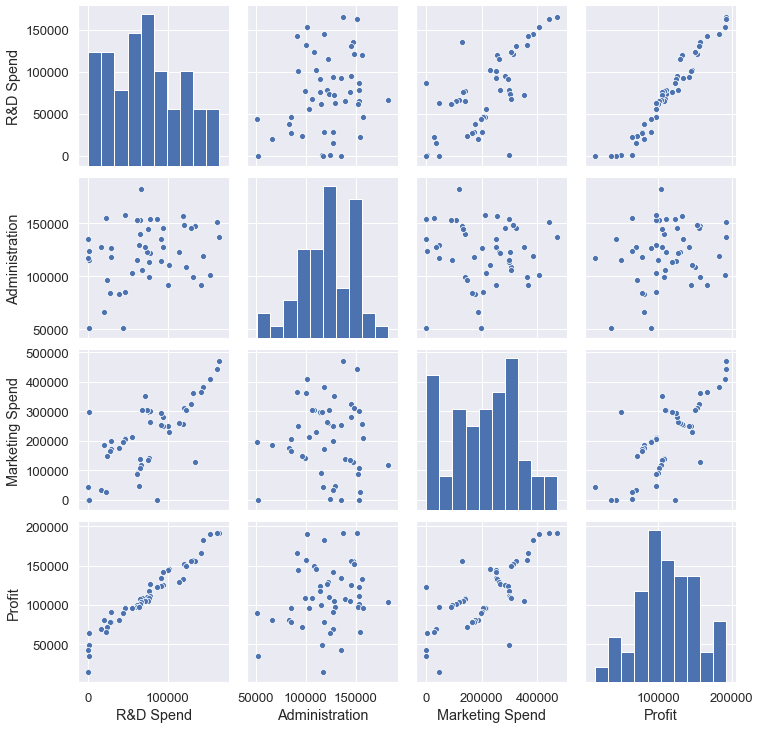

In [26]:
sns.pairplot(df)

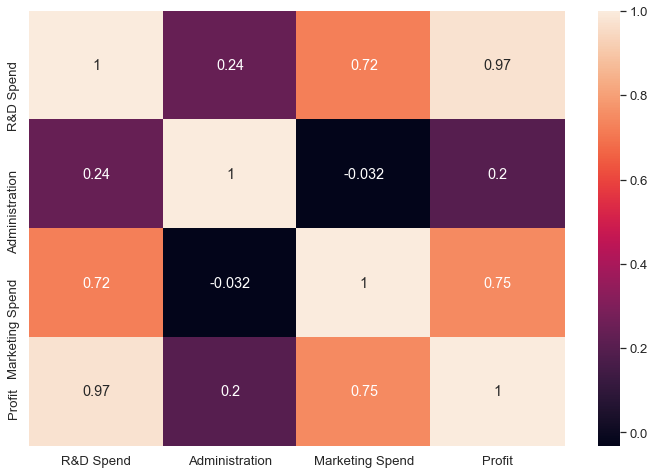

In [27]:
sns.heatmap(df.corr(),annot=True)

Profit increase by 97% when Research and Development spend<br>
Profit increase by 20% when Administration<br>
Profit increase by 75% when Marketing spend

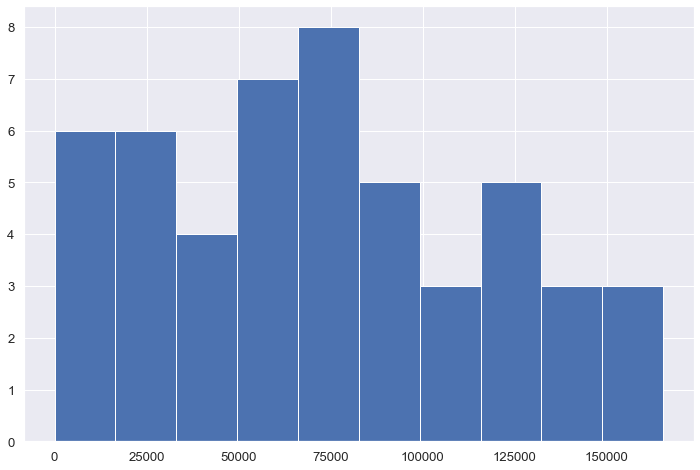

In [28]:
df["R&D Spend"].hist(bins=10)  

most start up spend 75k$ in Research and Development

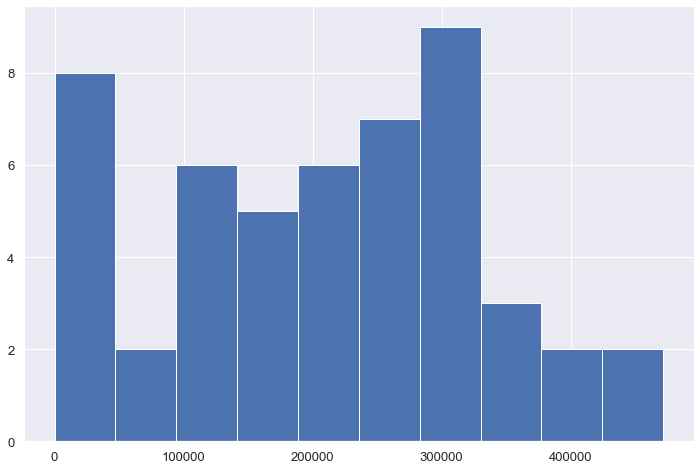

In [29]:
df["Marketing Spend"].hist(bins=10) 

The highest value for marketing spend is around 300,000$

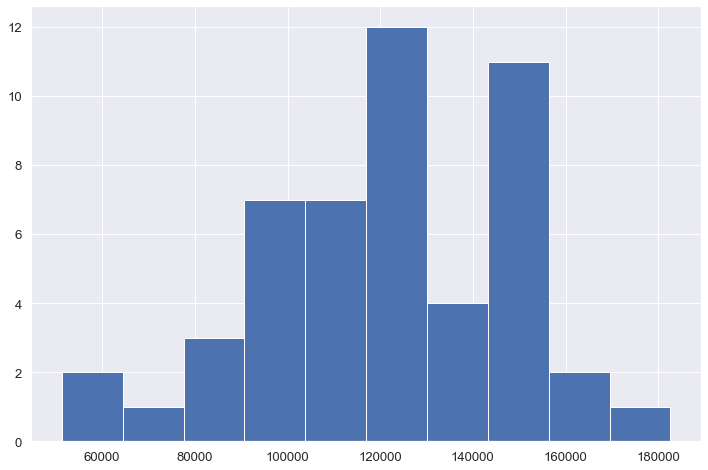

In [30]:
df["Administration"].hist(bins=10) 

It was the department's highest activity[120000] and It follows from between period[140000-160000]

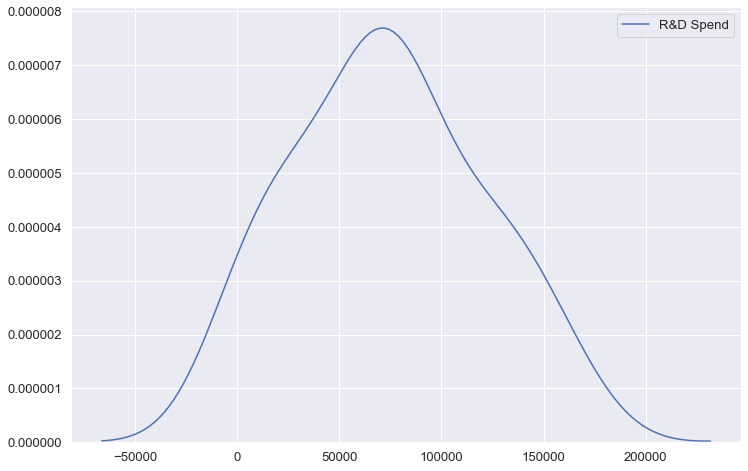

In [31]:
sns.kdeplot(df["R&D Spend"] )

The most frequent value approximately = 75000

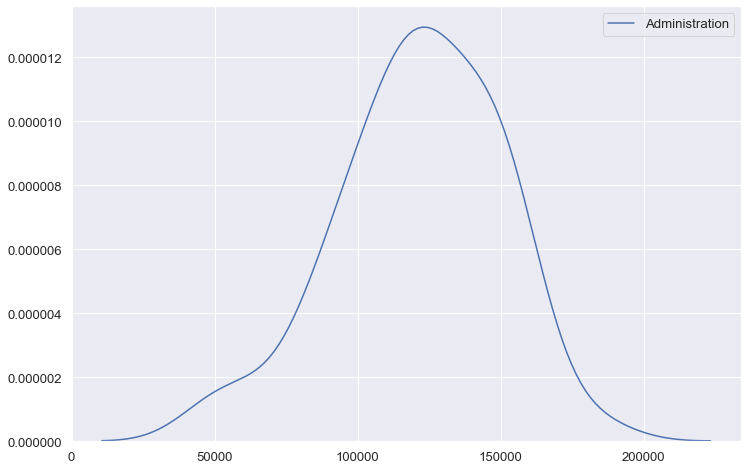

In [32]:
sns.kdeplot(df["Administration"] )

The most frequent value approximately = 125000<br>
left skewness

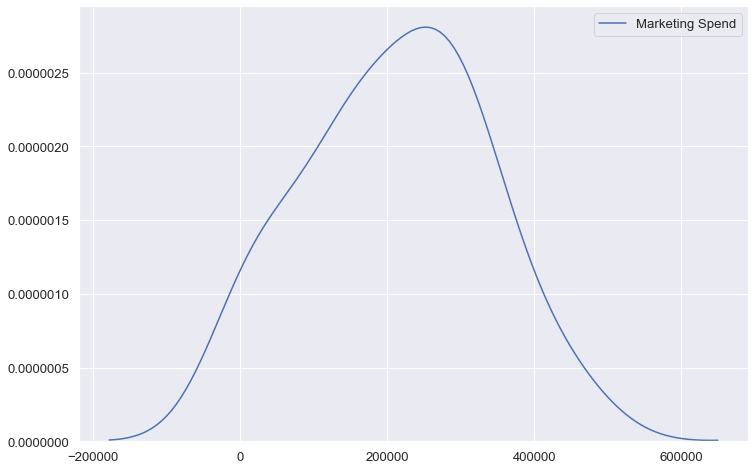

In [33]:
sns.kdeplot(df["Marketing Spend"] )

The most frequent value approximately = 250000<br>
right skewness

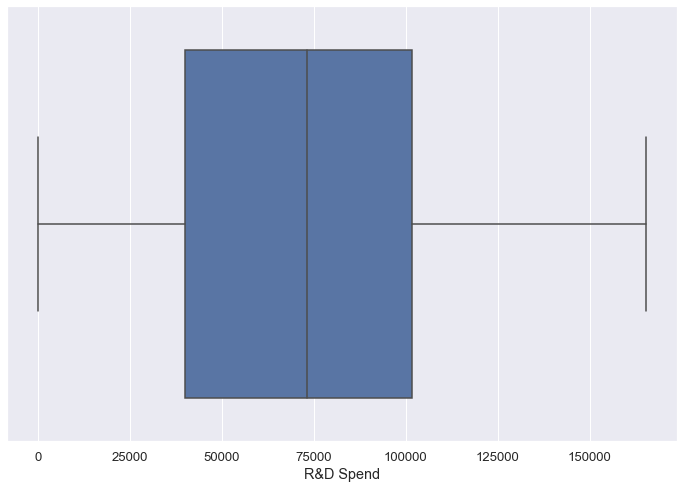

In [34]:
sns.boxplot(df["R&D Spend"])

no outlier<br>
data focused between approximately 43000 and 105000.<br>
median value = 75000 aproximately

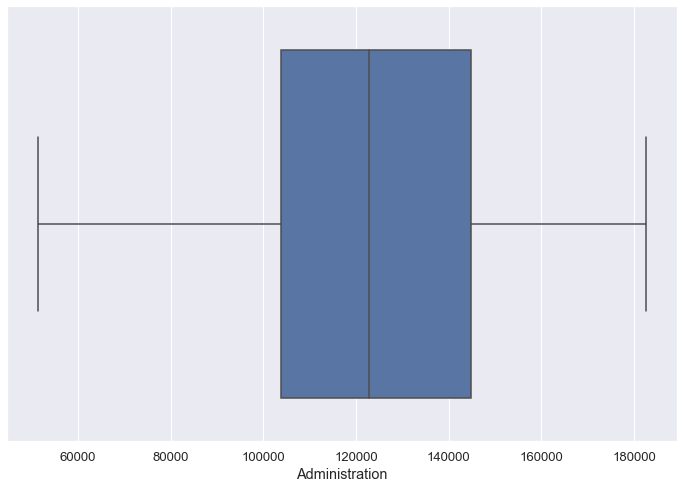

In [35]:
sns.boxplot(df["Administration"])

no outlier<br>
data focused between approximately 105000 and 145000.<br>
median value = 125000 aproximately

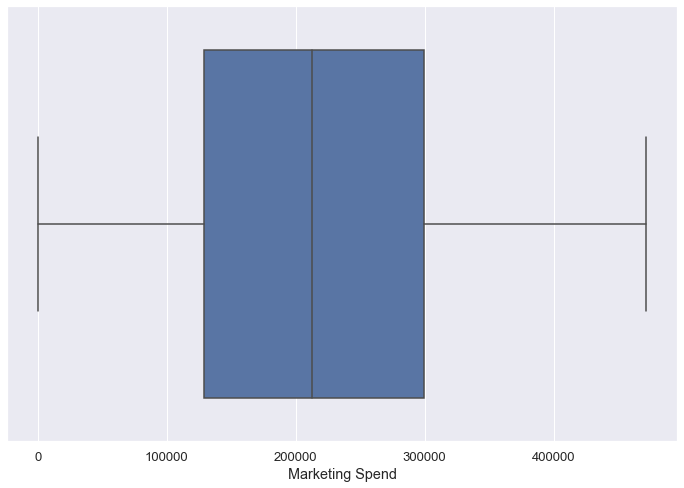

In [36]:
sns.boxplot(df["Marketing Spend"])

no outlier <br>
data focused between approximately 145000 and 300000.<br>
median value = 125000 aproximately

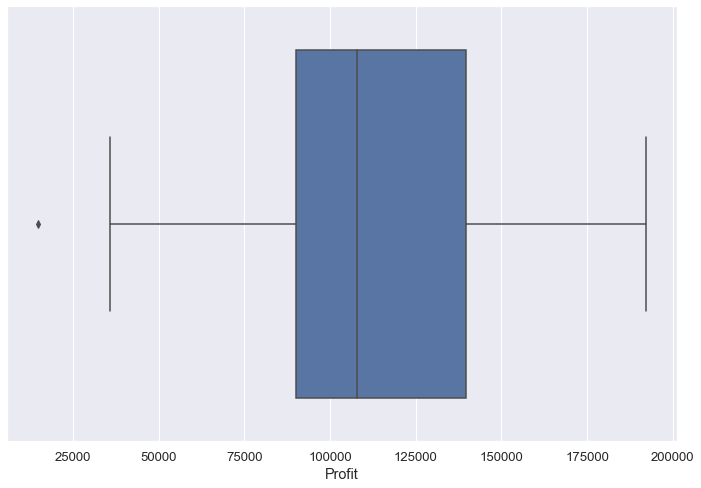

In [37]:
sns.boxplot(df["Profit"])

one outlier <br>
data focused between approximately 90000 and 166000.<br>
median value = 110000 aproximately.<br>
there are a one outlier it's value is less than 25000

# Data Preprocessing

In [38]:
df['R&D Spend'].fillna(df['R&D Spend'].mean(), inplace=True)

In [39]:
df['Marketing Spend'].fillna(df['Marketing Spend'].mean(), inplace=True)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(df.loc[:, df.columns != 'State']) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
df['State']= label_encoder.fit_transform(df['State']) 
df['State'].unique()

array([2, 0, 1])

In [42]:
df['State']

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int32

In [43]:
x = df[['R&D Spend', 'Marketing Spend','State']]
# x = df[['R&D Spend','State']]
# x = df[['R&D Spend']]
y = df['Profit']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train Model

In [45]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test Model on `x_test`

In [46]:
y_pred = model.predict(x_test)
y_pred

array([127256.7153393 ,  82669.73634045,  97189.26575827,  45867.70800075,
       129696.15403655,  45436.75613503, 109240.54373802, 101508.07624073,
        96922.6188118 , 112192.45245732, 128196.9355846 , 170268.14281983,
        87819.38575328, 150958.49372807, 172294.44284379])

In [47]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

# Calculate R2 Score

In [48]:
model.score(x_train, y_train)

0.9483288309121576

In [49]:
model.score(x_test, y_test)

0.9520886750456264

# Calculate Root Mean Square Error

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

8210.437353411478

# Test Model on custom data

In [52]:
model.predict([[140000,400000,0]])

array([170362.5069543])

# Get Model Parameters

In [53]:
model.coef_

array([ 7.77334922e-01,  3.92832464e-02, -4.03458813e+02])

In [54]:
model.intercept_

45822.31936771042

In [55]:
pd.DataFrame(model.coef_, x.columns, columns=["Coeff"]) 

,Coeff
R&D Spend,0.777335
Marketing Spend,0.039283
State,-403.458813


y=b0+b1X1+b2X2+bnXn